In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import math
import csv
import pandas as pd
import seaborn as sns

df = pd.read_csv('hw1_input.csv', parse_dates=True)

3-1

In [2]:
sns.pairplot(df)

In [3]:
df.head(5)

,Age,Sex,Chest Pain,BP,Cholestoral,fasting blood sugar > 120,resting ECG,max hr,angina,oldpeak,slope,major vessels,defect,heart disease
0,70,Female,Abnormal,130,322,No,hyper,109,No,2.4,Flat,3,Normal,Yes
1,67,Male,Asymptomatic,115,564,No,hyper,160,No,1.6,Flat,0,reversible Defect,No
2,57,Female,Angina,124,261,No,norm,141,No,0.3,Up,0,reversible Defect,Yes
3,64,Female,Abnormal,128,263,No,norm,105,Yes,0.2,Flat,1,reversible Defect,No
4,74,Male,Angina,120,269,No,hyper,121,Yes,0.2,Up,1,Normal,No


3-2

In [4]:
from sklearn.preprocessing import LabelEncoder

def preprocessing(x):
    le = LabelEncoder()
    le.fit(x)
    data = le.transform(x) 
    return pd.Series(data)

df['Sex'] = preprocessing(df['Sex'])
df['Chest Pain'] = preprocessing(df['Chest Pain'])
df['fasting blood sugar > 120'] = preprocessing(df['fasting blood sugar > 120'])
df['resting ECG'] = preprocessing(df['resting ECG'])
df['angina'] = preprocessing(df['angina'])
df['slope'] = preprocessing(df['slope'])
df['defect'] = preprocessing(df['defect'])
df['heart disease'] = preprocessing(df['heart disease'])

In [5]:
df.head(5)

,Age,Sex,Chest Pain,BP,Cholestoral,fasting blood sugar > 120,resting ECG,max hr,angina,oldpeak,slope,major vessels,defect,heart disease
0,70,0,0,130,322,0,0,109,0,2.4,1,3,1,1
1,67,1,2,115,564,0,0,160,0,1.6,1,0,2,0
2,57,0,1,124,261,0,2,141,0,0.3,2,0,2,1
3,64,0,0,128,263,0,2,105,1,0.2,1,1,2,0
4,74,1,1,120,269,0,0,121,1,0.2,2,1,1,0


In [6]:
x = df[['Age', 'Sex', 'Chest Pain', 'BP', 'Cholestoral', 'fasting blood sugar > 120',
      'resting ECG', 'max hr', 'angina', 'oldpeak', 'slope', 'major vessels', 'defect']]
y = df[['heart disease']]

In [7]:
import statistics
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

n_bootstraps = 1000

#las = LogisticRegression(penalty='l1')
#rid = LogisticRegression(penalty='l2')
las = Lasso(alpha=0.1)
rid = Ridge(alpha=0.1)
l_coef = []
r_coef = []

for _ in range(n_bootstraps):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
    las.fit(x_train, y_train.values.ravel())
    rid.fit(x_train, y_train.values.ravel())
    l_coef.append(las.coef_)
    r_coef.append(rid.coef_)

In [24]:
lasso_coef_mean = np.mean(np.asarray(l_coef), axis=0)
ridge_coef_mean = np.mean(np.asarray(r_coef), axis=0)

In [26]:
ridge_coef_mean.shape

(13,)

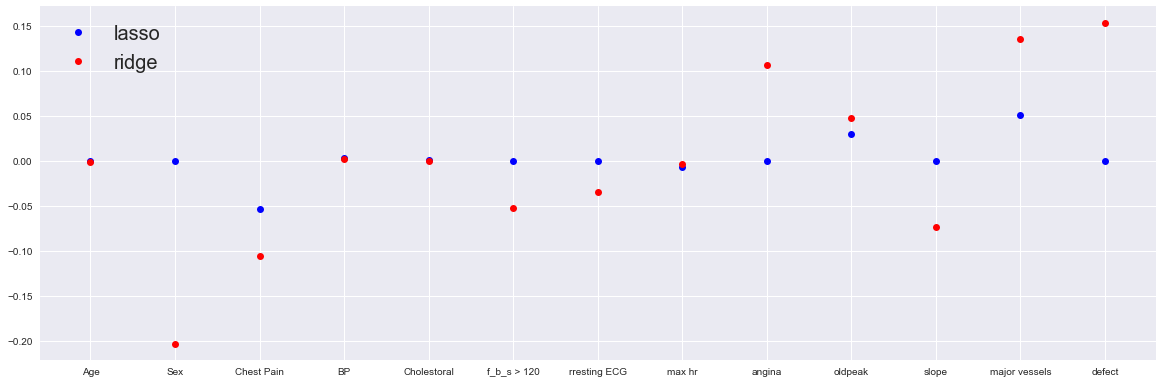

In [36]:
plt.figure(figsize=(20, 6.5))
plt.plot([0,1,2,3,4,5,6,7,8,9,10,11,12],lasso_coef_mean, 'bo', label = 'lasso')
plt.plot([0,1,2,3,4,5,6,7,8,9,10,11,12], ridge_coef_mean, 'ro', label = 'ridge')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12], ['Age', 'Sex', 'Chest Pain', 'BP', 'Cholestoral', 
                                            'f_b_s > 120', 'rresting ECG', 
                                            'max hr', 'angina', 'oldpeak', 'slope', 'major vessels', 'defect'])
plt.legend(prop={'size': 20})
plt.show()

3-3

In [10]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

roc_dict = {'ridge_reg': 0,  'lasso_reg': 0}
fpr[0], tpr[0], _ = roc_curve( y, rid.predict(x))
roc_auc[0] = auc(fpr[0], tpr[0])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.values.ravel(), rid.predict(x))
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

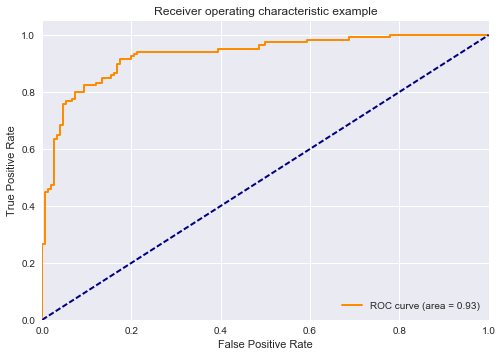

In [11]:
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()